### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [144]:
data = pd.read_csv('data/coupons.csv')

In [145]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

- There are 'NaN' in the columns "car", "Bar", "CoffeHouse", "CarryAway", "RestaurantLessThan20" and "Restaurant20To50".

3. Decide what to do about your missing data -- drop, replace, other...

If the data contains NaN or other meaningless values, I will remove the rows.
In order for better human readable data, I will replace the original data (eg. 1, 0) to descriptive words.

4. What proportion of the total observations chose to accept the coupon? 



In [146]:
data['Y'].sum()/12684

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

In [147]:
data_coupon = data['coupon'].value_counts().to_frame().reset_index()
data_coupon = data_coupon.rename(columns={'index': 'Coupon', 'coupon': 'Number of coupons'})
bar_coupon = px.bar(data_coupon, x = 'Coupon', y = 'Number of coupons')
bar_coupon.update_layout(title = 'Number of different kinds of coupons offered')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Count of temperature')

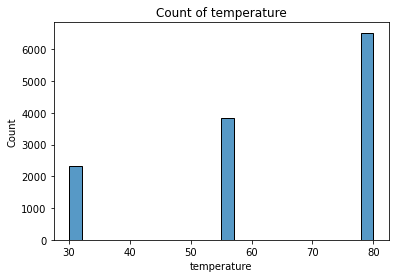

In [148]:
sns.histplot(data, x = 'temperature').set_title('Count of temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [149]:
data_barcoupon = data.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [150]:
data_barcoupon['Y'].sum()/len(data_barcoupon)

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [151]:
data_barlessthan3 = data_barcoupon.query("Bar =='1~3'or Bar =='never'or Bar == 'less1'")
data_barlessthan3['Y'].sum()/len(data_barcoupon)

0.330193356470005

In [152]:
data_barmorethan3 = data_barcoupon.query("Bar =='4~8'or Bar == 'gt8'")
data_barmorethan3['Y'].sum()/len(data_barcoupon)

0.07585523054040655

In [153]:
diff_accep_rate_between_bar3OrLess_to_whoWentMore_str = str(data_barlessthan3['Y'].sum()/len(data_barcoupon) - data_barmorethan3['Y'].sum()/len(data_barcoupon))
print('Difference between the acceptance rates of those who went to a bar 3 or fewer times a month to those who went more = ' + diff_accep_rate_between_bar3OrLess_to_whoWentMore_str)
print("Therefore, coupons should be given to drivers who went to a bar 3 or fewer times a month since this group had a higher acceptance rate.")

Difference between the acceptance rates of those who went to a bar 3 or fewer times a month to those who went more = 0.2543381259295984
Therefore, coupons should be given to drivers who went to a bar 3 or fewer times a month since this group had a higher acceptance rate.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [181]:
data_barwithoutnan=data.dropna(subset=['Bar'])
data_barmorethanonce = data_barwithoutnan.query("Bar =='1~3'or Bar =='4~8'or Bar =='gt8'")
data_barmorethanonce['Y'].sum()/len(data)

0.1911857458215074

In [182]:
data_over25 = data.query("age == '26' or age == '36' or age =='41' or age == '46' or age == '50plus'")
data_over25['Y'].sum()/len(data)

0.0717439293598234

In [183]:
diff_accep_rate_between_barMoreThanOnceAMonth_to_ageOver25_str = str(data_over25['Y'].sum()/len(data) - data_barmorethanonce['Y'].sum()/len(data))
print("Difference between acceptance rates of drivers who go to a bar more than once a month and are over the age of 25 to the all others = " + diff_accep_rate_between_barMoreThanOnceAMonth_to_ageOver25_str)
print("Therefore, coupons should be given to drivers who are over the age of 25 since this group had a higher acceptance rate.")

Difference between acceptance rates of drivers who go to a bar more than once a month and are over the age of 25 to the all others = -0.119441816461684
Therefore, coupons should be given to drivers who are over the age of 25 since this group had a higher acceptance rate.


5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

Null hypothesis is that, no relationship between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers.<br>
In addition, alternative hypothesis is that, there is some relationship between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers.<br><br>
The acceptance rates of any two groups should be the same.<br>
Hence, the null hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers is 0.<br>
Therefore, the corresponding alternative hypothesis for the difference is non-zero.

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

In [157]:
#convert age string into integer for calculation
data['ageMean'] = np.where(data['age']=='below21',18, np.where(data['age']=='21',23,np.where(data['age']=='26',28,np.where(data['age']=='31',33,np.where(data['age']=='36',38,np.where(data['age']=='41',43,np.where(data['age']=='46',48,np.where(data['age']=='50plus',53,'')))))))) #we use 18 because 
data['ageMean'] = pd.to_numeric(data['ageMean'])

alpha = 0.05
#defining Null and Alternative Hypotheses
H0 = 'mean age of group of "drivers who go to a bar more than once a month and are over the age of 25" is equal to that of group of all other drivers'
Ha = 'mean age of group of "drivers who go to a bar more than once a month and are over the age of 25" is NOT equal to that of group of all other drivers'

#defining Null and Alternative Hypotheses data
null_hypothesis_data = data.dropna(subset=['Bar']).query("ageMean > 25").query("Bar =='1~3'or Bar =='4~8'or Bar =='gt8'")
alternative_hypothesis_data = data.query("ageMean<=25").query("Bar !='1~3'and Bar !='4~8'and Bar !='gt8'")

#do calculation on the hypotheses and make conclusion
from scipy import stats
test_results = stats.ttest_ind(null_hypothesis_data['ageMean'], alternativehypothesis_data['ageMean'])
p = round(test_results[1],2)
if p>alpha:
    print(f"Since {p} > {alpha}, we fail to reject Null Hypothesis: {H0}")
else:
    print(f"Since {p} <= {alpha}, we reject Null Hypothesis in support of the Alternative Hypothesis: {Ha}")

Since 0.0 <= 0.05, we reject Null Hypothesis in support of the Alternative Hypothesis: mean age of group of "drivers who go to a bar more than once a month and are over the age of 25" is NOT equal to that of group of all other drivers


7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [176]:
data_barMoreThanOnceAndHadPassengersNotKid = data_barwithoutnan.query("Bar =='1~3'or Bar =='4~8'or Bar =='gt8'").query("passanger!='Kid(s)'")
data_barMoreThanOnceAndHadPassengersNotKid['Y'].sum()/len(data)

0.1815673289183223

In [177]:
data_hadOccupationsOtherThanFarmingFishingOrForestry = data.query("occupation!='Farming Fishing & Forestry'")
data_hadOccupationsOtherThanFarmingFishingOrForestry['Y'].sum()/len(data)

0.5666193629769789

In [180]:
diff_accep_rate_between_barMoreThanOnceAndHadPassengersNotKid_to_hadOccupationsOtherThanFarmingFishingOrForestry_str = str(data_hadOccupationsOtherThanFarmingFishingOrForestry['Y'].sum()/len(data) - data_barMoreThanOnceAndHadPassengersNotKid['Y'].sum()/len(data))
print("Difference between acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry = " + diff_accep_rate_between_barMoreThanOnceAndHadPassengersNotKid_to_hadOccupationsOtherThanFarmingFishingOrForestry_str)
print("Therefore, coupons should be given to drivers who have occupations other than farming, fishing, or forestry since this group had a higher acceptance rate.")

Difference between acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry = 0.3850520340586566
Therefore, coupons should be given to drivers who have occupations other than farming, fishing, or forestry since this group had a higher acceptance rate.


8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [161]:
data1_notkid = data_barmorethanonce.query('passanger == "Alone" or passanger == "Friend(s)" or passanger == "Partner"')
data1_notkid_notwidow = data1_notkid.query('maritalStatus == "Divorced" or maritalStatus == "Married partner" or maritalStatus == "Single" or maritalStatus == "Unmarried partner"')
data1_notkid_notwidow['Y'].sum()/12684

0.1815673289183223

In [162]:
data2_under30 = data_barmorethanonce.query('age == "below21" or age == "21 - 25" or age == "26 - 30"')
data2_under30['Y'].sum()/12684

0.00315357931251971

In [163]:
data3_incomelessthan50k = data.query("income == '$12500 - $24999' or income == '$25000 - $37499' or income == '$37500 - $49999' or income == 'Less than $12500'")
data3_incomelessthan50k_morethan4 = data3_incomelessthan50k.query("RestaurantLessThan20 == '4~8' or RestaurantLessThan20 == 'gt8'")
data3_incomelessthan50k_morethan4['Y'].sum()/12684

0.10793125197098707

9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

    Based on the above observations:
  - In general, there are more people (around 60%) reject the bar coupons.
  - People who go to bar for fewer times a month have a higher tendency to accept the bar coupons.
  - People who age over 25 have a higher tendency to accept the bar coupons than those who go to the bar for one time or more a month. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Data cleaning
- Add a column 'Coupon Acceptance' to represent a humanreadable categorial value of 'Y', eg. value 0 in column 'Y' will be represented by 'Rejected', value 1 in column 'Y' will be represented by 'Accepted' under this column.
- Replace '21' by '21 - 25', '26' by '26 - 30', '31' by '31 - 35', '36' by '36 - 40','41' by '41 - 45' and '46' by '46 - 50' under the column 'age'.
- Replace '2h' by '2 hours' and '1d' by '1 day' under the column 'expiration' make it more readable.

In [164]:
#add a column 'Coupon Acceptance'
data['Coupon Acceptance'] = np.where(data.Y==1, 'Accepted', 'Rejected')

#replace the numbers of age by ranges
data['age'] = data['age'].replace('21', '21 - 25')
data['age'] = data['age'].replace('26', '26 - 30')
data['age'] = data['age'].replace('31', '31 - 35')
data['age'] = data['age'].replace('36', '36 - 40')
data['age'] = data['age'].replace('41', '41 - 45')
data['age'] = data['age'].replace('46', '46 - 50')

#replace '2h' by '2 hours' and '1d' by '1 day'
data['expiration'] = data['expiration'].replace('2h', '2 hours')
data['expiration'] = data['expiration'].replace('1d', '1 day')

### Age of drivers
- The bar chart below shows the distribution of ages of drivers who received coupons.
- Most of the drivers age between 21 to 25.

In [165]:
data_age = data['age'].value_counts().to_frame().reset_index()
data_age = data_age.rename(columns={'index': 'Age', 'age': 'Number of drivers'})
df_age_mapping = pd.DataFrame({'Age':['below21', '21', '26', '31', '36', '41', '46', '50plus']})
sort_mapping_age = df_age_mapping.reset_index().set_index('Age')
data_age['age_sort']=data_age['Age'].map(sort_mapping_age['index'])
data_age =data_age.sort_values('age_sort')

bar_age = px.bar(data_age, x = 'Age', y = 'Number of drivers')
bar_age.update_layout(title = 'Number of drivers at different ages')

### Types of accepted coupons
- The bar chart below shows the distribution of different types of coupons being accepted.
- Most of the accepted coupons are "coffee house" and "less expensive restaurant".

In [166]:
data_accept = data.query('Y == 1')
data_accept_coupon = data_accept['coupon'].value_counts().to_frame().reset_index()

data_accept_coupon = data_accept_coupon.rename(columns={'index': 'Coupon', 'coupon': 'Number of coupons'})
bar_accept_coupon = px.bar(data_accept_coupon, x = 'Coupon', y = 'Number of coupons')
bar_accept_coupon.update_layout(title = 'Number of different kinds of coupons accepted by drivers')


### Types of rejected coupons
- The bar chart below shows the distribution of different types of coupons being rejected.
- Most of the rejected coupons are "coffee house".

In [167]:
data_reject = data.query('Y == 0')
data_reject_coupon = data_reject['coupon'].value_counts().to_frame().reset_index()

data_reject_coupon = data_reject_coupon.rename(columns={'index': 'Coupon', 'coupon': 'Number of coupons'})
print(data_reject_coupon)
bar_reject_coupon = px.bar(data_reject_coupon, x = 'Coupon', y = 'Number of coupons')
bar_reject_coupon.update_layout(title = 'Number of different kinds of coupons rejected by drivers')

                  Coupon  Number of coupons
0           Coffee House               2001
1                    Bar               1190
2      Restaurant(20-50)                834
3        Restaurant(<20)                816
4  Carry out & Take away                633


### Investigate if the kind of coupons and the time recieved have any effect on the acceptance of coupons by drivers
- The heat map below shows the number of different kinds of coupons accepted or rejected by drivers at different time of the day.

<AxesSubplot:xlabel='time', ylabel='coupon-Coupon Acceptance'>

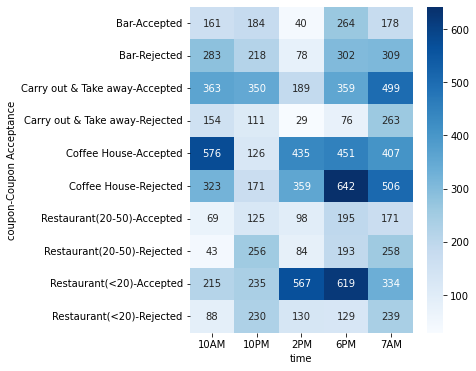

In [168]:
data_coupon_time_Y = pd.crosstab([data['coupon'], data["Coupon Acceptance"]], data['time'])
plt.figure(figsize = (5,6))
sns.heatmap(data_coupon_time_Y, annot = True, cmap="Blues", fmt = 'g')

- The five bar charts below shows different coupons accepted or rejected by drivers at 7 AM, 10 AM, 2 PM, 6 PM and 10 PM respectively.
- In general, we can see that at different time of the day, the number of coupons of "restaurant with average expense less than \\$20 per person" and "carry out & take away" accpted are more than those rejected.
- Furthermore, the number of coupons of "Bar" rejected are more than those being accepted at any time of the day.
- For coupons of "coffee house" received at 7 AM, 6 PM and 10 PM, the number of coupons being rejected are more than that being accepted; whereas those received at 10 AM and 2 PM, the number of coupons being accepted are more than that being rejected.
- For coupons of "more expensive restaurants (\\$20 - \\$50)" received at 10 AM, 2 PM and 6 PM, the number of coupons accepted are slightly more than those being rejected; while those received at 7 AM and 10 PM, the number of coupons being rejected are more than those being accepted.

[Text(0, 0.5, 'Count')]

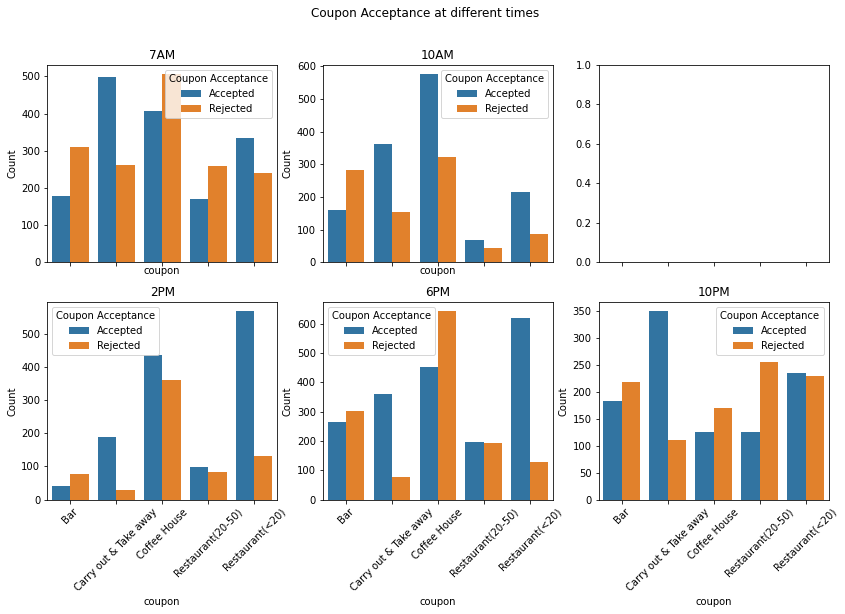

In [169]:
#init data
data_coupon_time_acceptance = pd.crosstab([data['coupon'], data["Coupon Acceptance"]], data['time'])

data_coupon_time_acceptance_resetindex = data_coupon_time_acceptance.reset_index(level=[0,1])

#init plotting subplots
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(14,8))
fig.suptitle('Coupon Acceptance at different times')
#rotate all plots' x-axis by 45 degrees
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 45)

#draw different time's barplot to subplots
sns.barplot(ax=axes[0, 0],data=data_coupon_time_acceptance_resetindex, x='coupon', y='7AM', hue='Coupon Acceptance')
axes[0, 0].set_title("7AM")
axes[0, 0].set(ylabel='Count')
    
sns.barplot(ax=axes[0, 1],data=data_coupon_time_acceptance_resetindex, x='coupon', y='10AM', hue='Coupon Acceptance')
axes[0, 1].set_title("10AM")
axes[0, 1].set(ylabel='Count')

sns.barplot(ax=axes[1, 0],data=data_coupon_time_acceptance_resetindex, x='coupon', y='2PM', hue='Coupon Acceptance')
axes[1, 0].set_title("2PM")
axes[1, 0].set(ylabel='Count')

sns.barplot(ax=axes[1, 1],data=data_coupon_time_acceptance_resetindex, x='coupon', y='6PM', hue='Coupon Acceptance')
axes[1, 1].set_title("6PM")
axes[1, 1].set(ylabel='Count')

sns.barplot(ax=axes[1, 2],data=data_coupon_time_acceptance_resetindex, x='coupon', y='10PM', hue='Coupon Acceptance')
axes[1, 2].set_title("10PM")
axes[1, 2].set(ylabel='Count')

- The two bar charts below shows the number of coupons accepted and rejected by the drivers at different times and with different kinds of coupons received.
- From the bar chart of coupons being rejected, we can see that the coupons of "Coffee House" being rejected the most, especially at 6 PM.
- From the bar chart of coupons being accepted, we can see that the coupons of "Coffee House" and "restaurant with average expense less than \$20 per person" being accepted the most, especially at 10 AM and 6 PM respectively.

[Text(0, 0.5, 'Count of Accepted Coupon')]

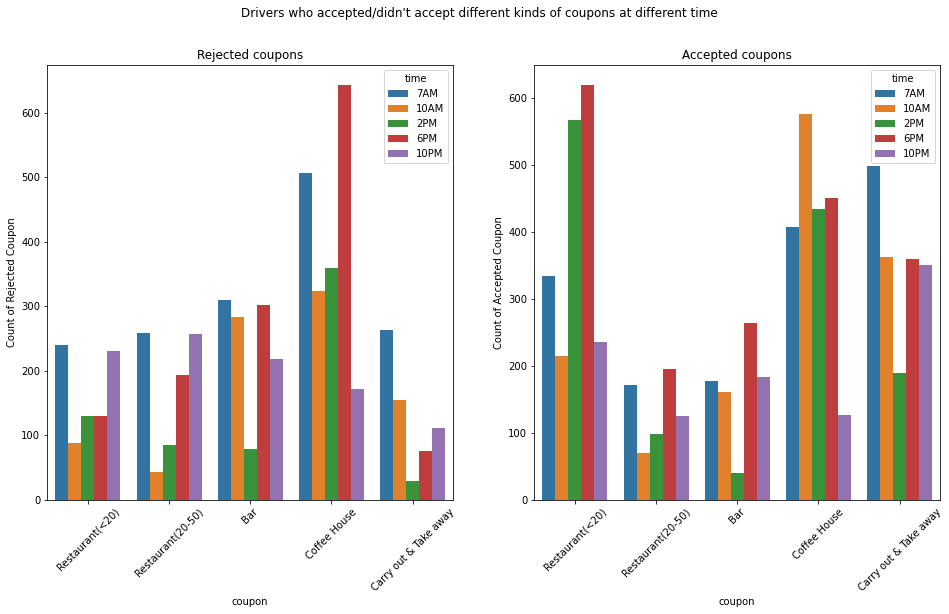

In [170]:
#Init data
data_coupon_time_acceptance = pd.crosstab([data['coupon'], data["time"]], data['Y'])
data_coupon_time_acceptance_resetIndex = data_coupon_time_acceptance.reset_index(level=[0,1])

#start drawing subplots
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(16,8))
fig.suptitle('Drivers who accepted/didn\'t accept different kinds of coupons at different time' )

#rotate the x-axis labels to better readable
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 45)

#sort the column time according to our mapping
df_time_mapping = pd.DataFrame({'time':['7AM', '10AM', '2PM', '6PM', '10PM']})
sort_mapping = df_time_mapping.reset_index().set_index('time')
data_coupon_time_acceptance_resetIndex['time_sort']=data_coupon_time_acceptance_resetIndex['time'].map(sort_mapping['index'])
data_coupon_time_acceptance_resetIndex=data_coupon_time_acceptance_resetIndex.sort_values('time_sort')

#plot two subplots for comparison and assign appropriate labels
sns.barplot(ax=axes[0],data=data_coupon_time_acceptance_resetIndex, x='coupon', y=0, hue='time')
axes[0].set_title("Rejected coupons")
axes[0].set(ylabel='Count of Rejected Coupon')

sns.barplot(ax=axes[1],data=data_coupon_time_acceptance_resetIndex, x='coupon', y=1, hue='time')
axes[1].set_title("Accepted coupons")
axes[1].set(ylabel='Count of Accepted Coupon')

### Age and Education of drivers
- From the heat map below, we can see that drivers with bachelors degree and age around 21 and 26 (713 drivers from the dataset), and drivers with some college - no degree and age 21 (653 drivers from the dataset)tend to accept the coupons the most.
- Also, from the heat map below, drivers with bachelors degree and age 26 (516 drivers from the dataset) tend to reject the coupons the most.
- Heat map is used because it can the relationship between variables.

[Text(68.99999999999999, 0.5, 'Education - Coupon Acceptance')]

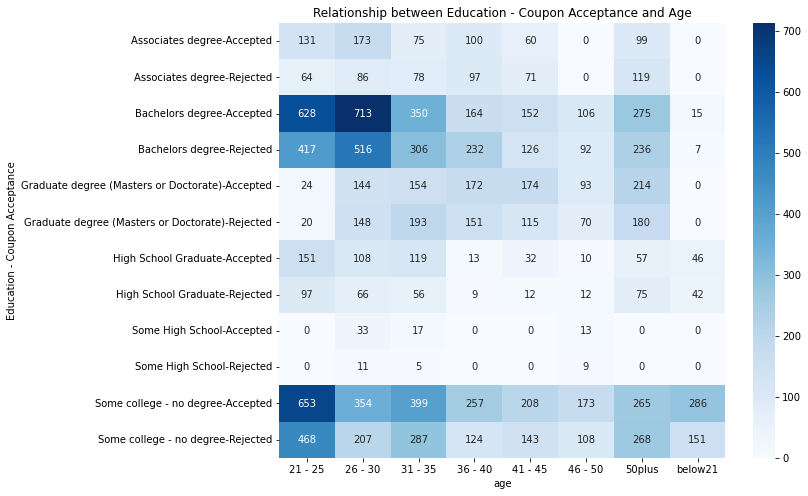

In [175]:
#Find frequency of drivers with different education levels and ages 
#who accepted or rejected coupons
data_edu_age_acceptance = pd.crosstab([data['education'], data["Coupon Acceptance"]], data['age'])
plt.figure(figsize = (10,8))
#draw a heat map with annotation, fmt = 'g' for showing the whole number
heatmap_edu_age_acceptance = sns.heatmap(data_edu_age_acceptance, annot = True, cmap="Blues", fmt = 'g')
heatmap_edu_age_acceptance.set_title("Relationship between Education - Coupon Acceptance and Age")
heatmap_edu_age_acceptance.set(ylabel='Education - Coupon Acceptance')

### Destination and types of passangers of the car
- From the heat map below, we can see that drivers with no urgent place as destination and are with friends (2221 drivers in total in the data set) tend to accept coupons the most.
- Also, from the heat map below, we can see that drivers who are going to work and who are alone (1575 drivers in total in the data set) tend to reject coupons the most.

Text(0.5, 1.0, 'Relationship between destination-passenger and Coupon Acceptance')

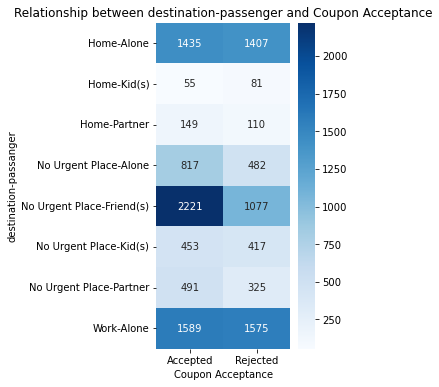

In [172]:
#init data
data_destination_passanger_Y = pd.crosstab([data['destination'], data['passanger']], data["Coupon Acceptance"])
plt.figure(figsize = (3,6))
#plot heat map
sns.heatmap(data_destination_passanger_Y, annot = True, cmap = "Blues", fmt = 'g')
plt.title("Relationship between destination-passenger and Coupon Acceptance")

Text(0.5, 1.0, 'Relationship between Coupon Expiration and Coupon Acceptance')

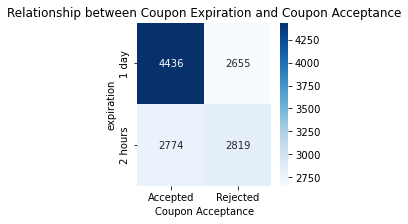

In [173]:
#init data
data_expiration_Y = pd.crosstab(data['expiration'], data['Coupon Acceptance'])
plt.figure(figsize = (3,3))
#plot heat map
sns.heatmap(data_expiration_Y, annot = True, cmap="Blues", fmt = 'g')
plt.title("Relationship between Coupon Expiration and Coupon Acceptance")

## Observation
- Number of coupons of "coffee house" distributed is the largest, which is 3996.
- Number of coupons of "less expensive restaurants (under \\$20)" distributed is the smallest, which is 1492, less than half of those of "coffee house".
- Number of coupons distributed to drivers who age between 21 to 25 is the largest, which is 2653.
- Number of coupons distributed to drivers who age under 21 is the smallest, which is 547.
- Most accepted coupons are with expiration of 1 day, whereas the number of accepted and rejected coupons with expiration of 2 hours are more or less the same.
- Number of conpons of "less expensive restaurant" are accepted when distributed ay 6 PM.
- Most of the coupons are accepted by drivers with Bachelor's degree and age 26, and with drivers with some college education and age  under 21.

## Next steps and recommendations

- For the 'age' collection, specific age is recommended to be included instead of a range for a better analysis.
- Same number of different kinds of coupons should be distributed in order to obtain a fairer analysis.
- Same number of different kinds of coupons should be distributed in different time periods.
- Coupons with expiration of 1 day should be distributed in order to optimize the coupon acceptance.
- Coupons should be distributed to younger drivers to maximize the acceptance of coupons.
- Less expensive coupons should be distributed to drivers at 6 PM to maximize the acceptance of less expensive coupons.
- In general, coffee house coupons and less expensive coupons should be sidtributed in a larger number than the other kind of coupons based on this analysis.